In [1]:
import requests
import pandas as pd
import re
from collections import Counter

In [2]:
API_KEY = "<ADD_API_KEY>"
API_KEY_SECRET = "<ADD_API_KEY_SECRET>"
BEARER_TOKEN = "<ADD_BEARER_TOKEN>"



In [3]:
handle = "CommBank"
url = f"https://api.twitter.com/2/tweets/search/recent?query=from:{handle}&tweet.fields=created_at&expansions=author_id&user.fields=created_at"
headers = {"Authorization": "Bearer {}".format(BEARER_TOKEN)}

## Proposal for Insight Creation from CommBank Twitter Data

This proposal outlines potential insights that can be derived from the Twitter API response data for the CommBank handle.  The analysis will leverage the provided Python script as a starting point, focusing on the available fields to extract meaningful information.

**I. Data Fields and Potential Insights:**

1. **`created_at` (Tweet & User):**

    * **Insights:** Analyze tweet posting frequency and patterns over time.  Identify potential correlations between posting times and engagement metrics (if available).  Compare tweet posting activity to user account creation date to understand growth patterns.
    * **Methods:** Time series analysis, trend identification, visualization (e.g., histograms, line graphs).

2. **`text` (Tweet):**

    * **Insights:** Perform sentiment analysis to gauge public perception of CommBank.  Identify trending topics or keywords related to the bank's services and products.  Analyze the language used to understand customer feedback and identify potential areas for improvement.  Detect mentions of competitors and track their relative sentiment.
    * **Methods:** Natural language processing (NLP), sentiment analysis, topic modeling, keyword extraction, competitor analysis.

3. **`author_id`:**

    * **Insights:** In combination with user data, this allows us to understand which users are most active and influential in their discussions about the bank.  This can help in identifying key influencers and community leaders.
    * **Methods:** User network analysis, identification of key influencers.


**II. Proposed Analysis Steps:**

1. **Data Enrichment (if possible):**  The current script fetches limited data.  Expand the request to include additional fields like `public_metrics` (retweet count, reply count, like count, quote count), and potentially `entities` (hashtags, mentions, URLs). These metrics will provide important context for the sentiment and topic analysis.
2. **Sentiment Analysis:** Apply a sentiment analysis model to the `text` field.  Categorize tweets as positive, negative, or neutral.  Visualize the sentiment distribution over time to spot trends.  Identify the most positive and negative tweets for deeper qualitative analysis.
3. **Topic Modeling:** Employ topic modeling techniques to uncover underlying topics discussed in the tweets.  Explore what customers talk about the most, identify recurring themes, and categorize these discussions.
4. **Keyword Extraction:**  Extract relevant keywords from the tweets.  Create a word cloud to visually represent the frequency of keywords.  Identify keywords associated with positive and negative sentiment to gain deeper insight into what customers are saying.
5. **Network Analysis (if more data available):**  Analyze the relationships between users who mention CommBank.  Identify clusters of users who share common interests or opinions. Visualize this network to understand community dynamics.
6. **Time Series Analysis:** Analyze the changes in sentiment, topic trends and mentions over time. This can show how the perception of the bank fluctuates over time.
7. **Comparison to Competitors:** If data is available for competitors, compare their sentiment scores and topic trends to CommBank. This will help see how CommBank is performing in the market.



**III. Output and Reporting:**

The analysis results should be presented in clear visualizations and reports. Consider incorporating interactive dashboards, allowing for dynamic exploration of the data. Key findings should be highlighted in the reports, offering actionable insights for CommBank's marketing, customer service, and product development teams.

**IV. Tools and Technologies:**

* **Programming Language:** Python
* **Libraries:** Pandas, NLTK, spaCy, Gensim, NetworkX, matplotlib, seaborn.
* **Cloud Services:**  Google Cloud Platform (for data storage and processing).
* **Visualization:** Tableau or similar interactive visualization tools.


This proposal provides a framework for analyzing CommBank's Twitter data to generate valuable insights.  The specifics of the analysis can be refined based on the availability of additional data and specific business objectives.


In [ ]:
import tweepy

# Replace with your own Bearer Token
bearer_token = BEARER_TOKEN

# Initialize the client
client = tweepy.Client(bearer_token=bearer_token)

# Define the username and get the user ID
username = "CommBank"
user = client.get_user(username=username)
user_id = user.data.id

# Fetch tweets (up to 100 per call, limited by Twitter)
tweets = client.get_users_tweets(id=user_id, max_results=100,tweet_fields=['created_at', 'author_id'])


# # Print out tweets
# for tweet in tweets.data:
#     print(tweet.text)

# Step 5: Extract data into a DataFrame
tweet_data = [{
    'text': tweet.text,
    'author_id': tweet.author_id,
    'created_at': tweet.created_at
} for tweet in tweets.data] if tweets.data else []

tweets_df = pd.DataFrame(tweet_data)

# Step 6: Show the DataFrame
print(tweets_df.head())

In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

for tweet in tweets_df['text']:
    print(analyzer.polarity_scores(tweet))

def get_polarity_scores(tweet):
  return analyzer.polarity_scores(tweet)

{'neg': 0.08, 'neu': 0.776, 'pos': 0.145, 'compound': 0.4767}
{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.8481}
{'neg': 0.115, 'neu': 0.606, 'pos': 0.279, 'compound': 0.7506}
{'neg': 0.104, 'neu': 0.824, 'pos': 0.071, 'compound': -0.0516}
{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.8126}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.031, 'neu': 0.915, 'pos': 0.054, 'compound': 0.25}
{'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'compound': 0.3818}
{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'compound': 0.5859}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'compound': 0.765}
{'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'compound': 0.3182}
{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'compound': 0.3612}
{'neg': 0.151, 'neu': 0.849, 'pos': 0.0, 'compound': -0.4939}
{'neg': 0.035, 'neu': 0.834, 'pos': 0.131, 'compound': 0.6542}
{'neg': 0.0, 'neu': 0.79, 'pos': 0.21

In [25]:
tweets_df['polarity_score'] = tweets_df['text'].apply(get_polarity_scores)
tweets_df.head(10)

,text,author_id,created_at,polarity_score
0,"@aliciagjones Hi there Alicia, if you would li...",14787749,2025-04-14 01:04:01+00:00,"{'neg': 0.08, 'neu': 0.776, 'pos': 0.145, 'com..."
1,@hungnguyen1711 I do hear you and understand w...,14787749,2025-04-12 00:48:21+00:00,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp..."
2,"@hungnguyen1711 Hey there, sorry for the incon...",14787749,2025-04-12 00:40:04+00:00,"{'neg': 0.115, 'neu': 0.606, 'pos': 0.279, 'co..."
3,"@wade396 Hi Tanya, the maintenance was this mo...",14787749,2025-04-11 05:39:11+00:00,"{'neg': 0.104, 'neu': 0.824, 'pos': 0.071, 'co..."
4,@goudagoddess Excellent I am glad that is reso...,14787749,2025-04-11 04:41:09+00:00,"{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp..."
5,@BenSilver_music Hi Ben. Based on the informat...,14787749,2025-04-11 03:24:08+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,@_Tolaa The below link provides information re...,14787749,2025-04-11 03:02:17+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7,@_Tolaa Hi there. Sorry if you have been unabl...,14787749,2025-04-11 03:02:07+00:00,"{'neg': 0.031, 'neu': 0.915, 'pos': 0.054, 'co..."
8,"@goudagoddess Hi there Claire, Can I ask have ...",14787749,2025-04-10 23:15:19+00:00,"{'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'comp..."
9,"@zac_drayson Hi Zac, thank you for your messag...",14787749,2025-04-10 18:15:23+00:00,"{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'comp..."


#Insightful Plots
## Plot-1: Average sentiment score of tweets over time based on tweet creation date.

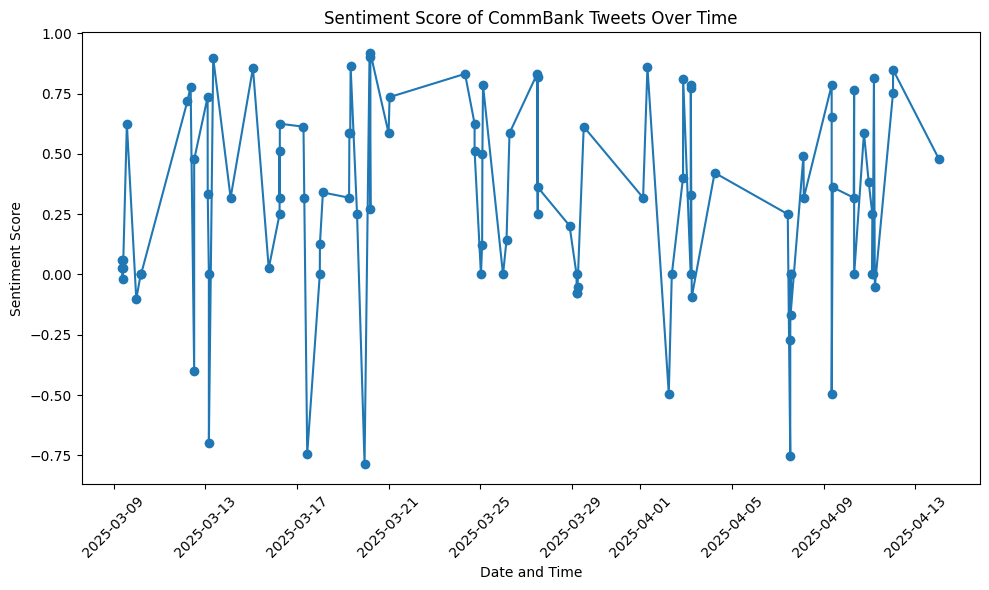

In [26]:
import matplotlib.pyplot as plt

# Assuming 'tweets_df' DataFrame exists with 'created_at' and sentiment scores

# Sample data (replace with your actual data)
# tweets_df['sentiment_score'] = [0.2, -0.5, 0.8, 0.1, -0.3]  # Example sentiment scores
# tweets_df['created_at'] = pd.to_datetime(['2024-07-26 10:00:00', '2024-07-26 11:00:00', '2024-07-26 12:00:00', '2024-07-26 13:00:00', '2024-07-26 14:00:00'])

# Ensure 'created_at' is datetime objects
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])

# Extract sentiment scores (replace 'compound' with your actual column name if different)
# Assuming you have already calculated the compound polarity scores from VADER
# and stored them in a column named 'compound' in the tweets_df DataFrame

# Create a new column with the compound polarity scores
tweets_df['compound'] = tweets_df['text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])


# Plotting sentiment over time
plt.figure(figsize=(10, 6))
plt.plot(tweets_df['created_at'], tweets_df['compound'], marker='o')
plt.xlabel('Date and Time')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score of CommBank Tweets Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Plot-2: Monthly average of twitter tweet count and the average sentiment of users per month

<ipython-input-28-c29359d253de>:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  tweets_df['year_month'] = tweets_df['created_at'].dt.to_period('M')


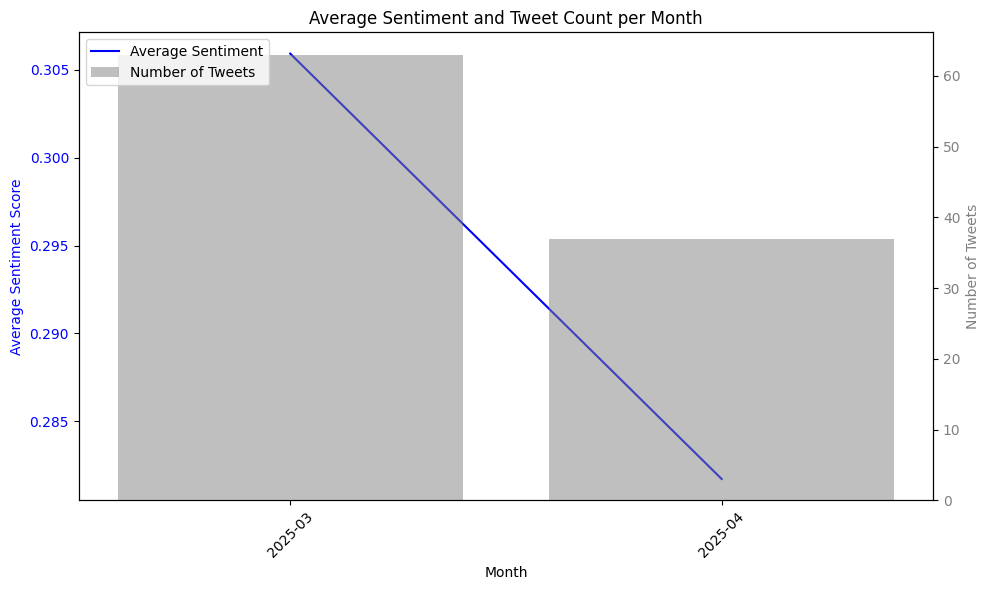

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'tweets_df' DataFrame exists with 'created_at' and 'compound' columns

# Convert 'created_at' to datetime objects if not already
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])

# Extract year and month
tweets_df['year_month'] = tweets_df['created_at'].dt.to_period('M')

# Group by year and month and calculate average sentiment and tweet count
monthly_sentiment = tweets_df.groupby('year_month')['compound'].mean()
monthly_counts = tweets_df.groupby('year_month')['compound'].count()

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot sentiment score
ax1.plot(monthly_sentiment.index.astype(str), monthly_sentiment.values, color='blue', label='Average Sentiment')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Sentiment Score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45)

# Create a second y-axis for the tweet count
ax2 = ax1.twinx()
ax2.bar(monthly_counts.index.astype(str), monthly_counts.values, color='gray', alpha=0.5, label='Number of Tweets')
ax2.set_ylabel('Number of Tweets', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Add title and legend
plt.title('Average Sentiment and Tweet Count per Month')
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

# Show the plot
plt.tight_layout()
plt.show()
